##  Week4 복습과제

Week3에 대한 복습과제입니다.  
데이터셋(train.csv, mushrooms.csv)을 다운 받아주세요!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 'train.csv'으로 train_df를 생성하세요.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/MyDrive/[EURON] 파이썬 머신러닝 완벽 가이드'

/content/drive/MyDrive/[EURON] 파이썬 머신러닝 완벽 가이드


In [5]:
train_df = pd.read_csv('train.csv')

#### 데이터 보정을 위해 다음 코드를 실행시켜 주세요.

In [6]:
# id 제외

train_df = train_df.drop("id", axis = 1)

#### LabelEncoder를 사용해 color, type column을 인코딩한 train_df를 만드시오.

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_df['color'] = encoder.fit_transform(train_df['color'])
train_df['type'] = encoder.fit_transform(train_df['type'])

train_df.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,3,1
1,0.575560,0.425868,0.531401,0.439899,4,2
2,0.467875,0.354330,0.811616,0.791225,0,1
3,0.776652,0.508723,0.636766,0.884464,0,1
4,0.566117,0.875862,0.418594,0.636438,4,0


#### feature간의 상관관계를 확인하는 heatmap을 출력하시오.

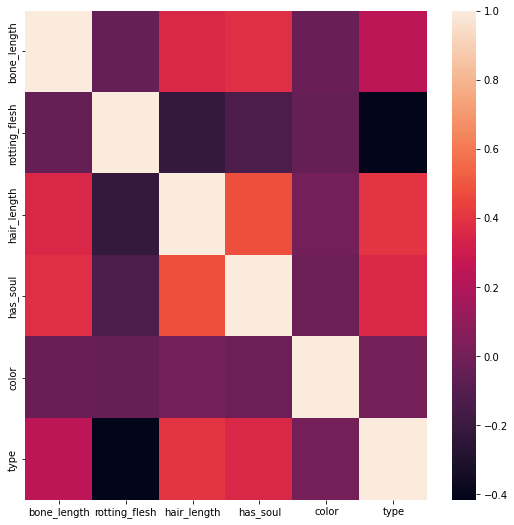

In [8]:
import seaborn as sns

plt.figure(figsize=(9,9))
data = train_df.corr()
sns.heatmap(data)

#### 독립변수(X)와 종속변수(y-type)로 분리해주세요(iloc 또는 loc 활용) 그리고 확인해주세요.
#### X와 y를 X_train, X_test, y_train, y_test으로 나누시오. (test_size=0.2, random_state=12) 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,5:]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

#### Gradient Boost를 활용하여 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. (random_state=0,n_estimators=50,learning_rate=0.5)


In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [13]:
gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, random_state=0)
gb_clf.fit(X_train, y_train)
pred = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('예측 정확도 : {0:.4f}'.format(accuracy))

예측 정확도 : 0.5867


#### GBM 하이퍼 파라미터 튜닝을 한 후, 최적의 하이퍼 파라미터를 구하고 정확도를 출력하시오. 위의 값과 정확도를 비교하시오. 이때 n_estimators는 50,100,500, learning_rate는 0.005, 0.1, 0.5,1,10 을 변수로 넣으시오.(gridsearchCV이용,cv=2,verbose=1)

In [14]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[50,100,500], 'learning_rate':[0.005,0.1,0.5,1,10]}

grid_cv = GridSearchCV(gb_clf, params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 파라미터 : ',grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))


Fitting 2 folds for each of 15 candidates, totalling 30 fits
최적 파라미터 :  {'learning_rate': 0.5, 'n_estimators': 50}
최고 예측 정확도 : 0.7601


#### 사이킷런 래퍼 클래스 XGBoost를 사용해 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. (n_estimators=400, learning_rate = 0.1, max_depth = 3)

In [15]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [16]:
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('예측 정확도 : {0:.4f}'.format(accuracy))

예측 정확도 : 0.6000


#### 사이킷런 래퍼 클래스 LightGBM를 사용해 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. 

n_estimators=400
조기 중단 파라미터: early_stopping_rounds=100, eval_metric="logloss",  eval_set=evals 

In [17]:
import lightgbm
from lightgbm import LGBMClassifier

evals = [(X_test, y_test)]
lgbm = LGBMClassifier(n_estimators=400)
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals)
pred = lgbm.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('예측 정확도 : {0:.4f}'.format(accuracy))

[1]	valid_0's multi_logloss: 1.0582	valid_0's multi_logloss: 1.0582
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 1.02126	valid_0's multi_logloss: 1.02126
[3]	valid_0's multi_logloss: 0.990058	valid_0's multi_logloss: 0.990058
[4]	valid_0's multi_logloss: 0.963914	valid_0's multi_logloss: 0.963914
[5]	valid_0's multi_logloss: 0.943196	valid_0's multi_logloss: 0.943196
[6]	valid_0's multi_logloss: 0.921984	valid_0's multi_logloss: 0.921984
[7]	valid_0's multi_logloss: 0.903408	valid_0's multi_logloss: 0.903408
[8]	valid_0's multi_logloss: 0.887559	valid_0's multi_logloss: 0.887559
[9]	valid_0's multi_logloss: 0.875751	valid_0's multi_logloss: 0.875751
[10]	valid_0's multi_logloss: 0.866617	valid_0's multi_logloss: 0.866617
[11]	valid_0's multi_logloss: 0.85743	valid_0's multi_logloss: 0.85743
[12]	valid_0's multi_logloss: 0.849555	valid_0's multi_logloss: 0.849555
[13]	valid_0's multi_logloss: 0.842697	valid_0's multi_logloss: 0.842697
[14]	

## Stacking 실습

CV set 기반 stacking을 통해 앙상블 모델을 만드려고 합니다.    
개별 모델이 교차검증을 통해 최종 모델이 사용할 학습용, 테스트용 데이터를 만드는 함수를 생성하시오.
```
def get_stacking_dataset(model, X_train, y_train, X_test, n_folds):
    return train_fold_pred , test_pred_mean
```

In [18]:
from sklearn.model_selection import KFold

In [19]:
def get_stacking_dataset(model, X_train, y_train, X_test, n_folds):
  kfold = KFold(n_splits=n_folds, shuffle=False)
  train_fold_pred = np.zeros((X_train.shape[0],1))
  test_pred_mean = np.zeros((X_test.shape[0],n_folds))

  for fold_cnt, (train_index, valid_index) in enumerate(kfold.split(X_train)):
    X_tr = X_train[train_index]
    y_tr = y_train[train_index]
    X_val = X_train[valid_index]

    model.fit(X_tr, y_tr)
    train_fold_pred[valid_index, :] = model.predict(X_val).reshape(-1,1)
    test_pred_mean[:,fold_cnt] = model.predict(X_test)

  test_pred_mean = np.mean(test_pred_mean, axis=1).reshape(-1,1)

  return train_fold_pred, test_pred_mean

스태킹에 사용될 개별 모델을 생성하시오.

개별 모델:  KNN(n_neighbors=4), 랜덤 포레스트(n_estimators=100, random_state=0), 결정 트리, AdaBoost(n_estimators=100), LightGBM(n_estimators=400)

최종 모델: 로지스틱 회귀 (C=10)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

knn = KNeighborsClassifier(n_neighbors=4)
rf = RandomForestClassifier(n_estimators=100, random_state=0)
dt = DecisionTreeClassifier()
ada = AdaBoostClassifier(n_estimators=100)
lgbm = LGBMClassifier(n_estimators=400)

lr_final = LogisticRegression(C=10)

위에서 생성한 함수를 사용해 개별 모델을 학습, 예측시켜 메타모델에 사용될 학습용 데이터와 테스트용 데이터를 생성하고, 스태킹하시오.  
fold 수 = 6  
학습용 데이터 : stacked_X_train  
테스트용 데이터 : stacked_X_test

In [21]:
knn_train, knn_test = get_stacking_dataset(knn, X_train, y_train, X_test, 6)
rf_train, rf_test = get_stacking_dataset(rf, X_train, y_train, X_test, 6)
dt_train, dt_test = get_stacking_dataset(dt, X_train, y_train, X_test, 6)
ada_train, ada_test = get_stacking_dataset(ada, X_train, y_train, X_test, 6)
lgbm_train,lgbm_test = get_stacking_dataset(lgbm, X_train, y_train, X_test, 6)

KeyError: ignored

In [ ]:
stacked_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train, lgbm_train ), axis=1)
stacked_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test, lgbm_test ), axis=1)

print('Original train / test : ', X_train.shape, ' / ', X_test.shape)
print('Stacking train / test : ', stacked_X_train.shape, ' / ', stacked_X_test.shape)

최종 모델 (logistic regression)을 학습시키고, 정확도를 구하시오.

In [ ]:
lr_final.fit(stacked_X_train, y_train)
pred = lr_final.predict(stacked_X_test)
accuracy = accuracy_score(y_test, pred)
print('정확도 : {0:.4f}'.format(accuracy))

### CatBoost

범주형 변수가 많은 데이터에 catboost를 적용해봅시다.

데이터 출처:
https://www.kaggle.com/datasets/uciml/mushroom-classification


In [38]:
# mushrooms.csv 파일을 사용합니다.

mushroom_df = pd.read_csv('mushrooms.csv')

mushroom_df feature들의 data type을 확인하시오.

In [39]:
mushroom_df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [44]:
import pandas as pd
mushroom_df = pd.get_dummies(mushroom_df)
mushroom_df.dtypes

class          int64
cap-shape      int64
cap-surface    int64
cap-color      int64
bruises        int64
               ...  
habitat_l      uint8
habitat_m      uint8
habitat_p      uint8
habitat_u      uint8
habitat_w      uint8
Length: 100, dtype: object

feature와 target을 각각 X_mushroom, y_mushroom으로 분리하고,  
train_test_split 함수로 train, test set을 분리하시오. (test size = 0.2)

In [45]:
X_mushroom = mushroom_df.drop(['class'],axis=1,inplace=False)
y_mushroom = mushroom_df['class']
X_train, X_test, y_train, y_test = train_test_split(X_mushroom, y_mushroom, test_size=0.2)

CatBoostClassifier를 불러오고, Pool 함수를 이용해 범주형 변수를 처리하도록 train_pool, test_pool을 만드시오.

In [25]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [26]:
from catboost import Pool

In [46]:
pool_train = Pool(data = X_train, label = y_train)
pool_test = Pool(data = X_test, label = y_test)

iteration=400, learning_rate=0.1, max_depth=3로 설정한 CatBoost 모델로 버섯에 대한 정보를 학습하고 테스트 데이터 버섯의 독성 여부를 예측하시오. 또 정확도를 구하시오.  

In [47]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier(iterations=400, learning_rate=0.1, max_depth=3)
cb_clf.fit(pool_train)
pred = cb_clf.predict(pool_test)
accuracy = accuracy_score(y_test, pred)
print('정확도 : ', accuracy)

0:	learn: 0.4690580	total: 49.1ms	remaining: 19.6s
1:	learn: 0.3626882	total: 51.1ms	remaining: 10.2s
2:	learn: 0.2463257	total: 53ms	remaining: 7.01s
3:	learn: 0.2007452	total: 54.8ms	remaining: 5.43s
4:	learn: 0.1674685	total: 56.9ms	remaining: 4.5s
5:	learn: 0.1223732	total: 58.8ms	remaining: 3.86s
6:	learn: 0.1029920	total: 60.5ms	remaining: 3.4s
7:	learn: 0.0848043	total: 62.4ms	remaining: 3.06s
8:	learn: 0.0687912	total: 64.3ms	remaining: 2.79s
9:	learn: 0.0594332	total: 66.1ms	remaining: 2.58s
10:	learn: 0.0552392	total: 68.2ms	remaining: 2.41s
11:	learn: 0.0486611	total: 69.9ms	remaining: 2.26s
12:	learn: 0.0460263	total: 71.9ms	remaining: 2.14s
13:	learn: 0.0403064	total: 73.8ms	remaining: 2.03s
14:	learn: 0.0372600	total: 75.4ms	remaining: 1.94s
15:	learn: 0.0349847	total: 77.3ms	remaining: 1.85s
16:	learn: 0.0316641	total: 79.1ms	remaining: 1.78s
17:	learn: 0.0295883	total: 81ms	remaining: 1.72s
18:	learn: 0.0272930	total: 82.9ms	remaining: 1.66s
19:	learn: 0.0255604	total: 

수고하셨습니다!